In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [3]:
df.shape

(268850, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [6]:
df.columns[((df.isna().sum()/len(df)) > 0.3)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'interiorQual',
       'petsAllowed', 'thermalChar', 'numberOfFloors', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [7]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.3)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'street', 'streetPlain', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'floor',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  int64  
 7   pricetrend            267018 non-null  float64
 8   telekomUploadSpeed    235492 non-null  float64
 9   totalRent             228333 non-null  float64
 10  yearConstructed       211805 non-null  float64
 11  scoutId               268850 non-null  int64  
 12  firingTypes           211886 non-null  object 
 13  hasKitchen            268850 non-null  bool   
 14  geo_bln               268850 non-null  object 
 15  

In [9]:
df.shape

(268850, 38)

In [10]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,floor,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,4.0,1.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,3.0,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,3.0,3.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,3.0,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,3.0,1.0,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,...,3.0,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,...,3.5,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,...,4.0,1.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,...,2.0,NaN,2,False,3,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",May19


In [11]:
df._get_numeric_data().mean()

serviceCharge           1.512061e+02
newlyConst              7.874651e-02
balcony                 6.164553e-01
picturecount            9.791958e+00
pricetrend              3.389001e+00
telekomUploadSpeed      2.880493e+01
totalRent               9.013315e+02
yearConstructed         1.966401e+03
scoutId                 1.069697e+08
hasKitchen              3.424065e-01
cellar                  6.406360e-01
yearConstructedRange    3.714544e+00
baseRent                6.941294e+02
livingSpace             7.435555e+01
lift                    2.355291e-01
baseRentRange           3.765256e+00
geo_plz                 3.728302e+04
noRooms                 2.641261e+00
floor                   2.122405e+00
noRoomsRange            2.571542e+00
garden                  1.962321e-01
livingSpaceRange        3.070790e+00
dtype: float64

In [12]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [13]:
df.isna().sum()/len(df)

regio1                  0.000000
serviceCharge           0.000000
heatingType             0.166844
telekomTvOffer          0.121328
newlyConst              0.000000
balcony                 0.000000
picturecount            0.000000
pricetrend              0.000000
telekomUploadSpeed      0.000000
totalRent               0.000000
yearConstructed         0.000000
scoutId                 0.000000
firingTypes             0.211880
hasKitchen              0.000000
geo_bln                 0.000000
cellar                  0.000000
yearConstructedRange    0.000000
baseRent                0.000000
houseNumber             0.264155
livingSpace             0.000000
geo_krs                 0.000000
condition               0.254748
street                  0.000000
streetPlain             0.264136
lift                    0.000000
baseRentRange           0.000000
typeOfFlat              0.136187
geo_plz                 0.000000
noRooms                 0.000000
floor                   0.000000
noRoomsRan

In [14]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        df[cols] = ((df[cols] - df[cols].mean())/(df[cols].std()))

df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,floor,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,...,0.515956,-3.432713e-01,1.523536,True,0.660359,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,3.711434e-18,...,0.136224,-1.358183e-16,0.456976,False,0.660359,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,...,0.136224,2.684000e-01,0.456976,False,0.660359,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,3.711434e-18,...,0.136224,2.684000e-01,0.456976,False,-0.760976,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,-0.043397,self_contained_central_heating,NaN,False,True,1.436871,-0.474423,-2.323544e-16,5.446935e-05,...,0.136224,-3.432713e-01,0.456976,False,0.660359,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,-0.201132,heat_pump,ONE_YEAR_FREE,False,True,-1.527988,-0.331433,-1.229879e+00,2.829922e-04,...,0.136224,-1.358183e-16,0.456976,False,0.660359,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,0.226066,gas_heating,NaN,False,True,0.344554,1.583622,-2.323544e-16,8.118061e-03,...,0.326090,-3.432713e-01,0.456976,False,1.371027,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,0.226066,central_heating,ONE_YEAR_FREE,False,True,1.748961,-0.249724,7.321796e-01,9.359146e-04,...,0.515956,-3.432713e-01,1.523536,True,0.660359,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,0.078190,heat_pump,NaN,True,True,0.968735,0.511192,-2.323544e-16,3.710835e-03,...,-0.243507,-1.358183e-16,-0.609583,False,-0.050308,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",May19


In [15]:
df.shape

(268850, 38)

In [16]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,floor,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,...,0.515956,-3.432713e-01,1.523536,True,0.660359,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,3.711434e-18,...,0.136224,-1.358183e-16,0.456976,False,0.660359,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,...,0.136224,2.684000e-01,0.456976,False,0.660359,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,3.711434e-18,...,0.136224,2.684000e-01,0.456976,False,-0.760976,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,-0.043397,self_contained_central_heating,NaN,False,True,1.436871,-0.474423,-2.323544e-16,5.446935e-05,...,0.136224,-3.432713e-01,0.456976,False,0.660359,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,-0.233993,gas_heating,ONE_YEAR_FREE,False,False,0.344554,-0.413142,-1.726934e+00,-7.552077e-03,...,0.136224,2.684000e-01,0.456976,False,0.660359,Essen,Horst,Bei dieser ansprechenden Immobilie handelt es ...,NaN,Feb20
268845,Bayern,-0.201132,heat_pump,ONE_YEAR_FREE,False,True,-1.527988,-0.331433,-1.229879e+00,2.829922e-04,...,0.136224,-1.358183e-16,0.456976,False,0.660359,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,0.226066,gas_heating,NaN,False,True,0.344554,1.583622,-2.323544e-16,8.118061e-03,...,0.326090,-3.432713e-01,0.456976,False,1.371027,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268848,Nordrhein_Westfalen,0.078190,heat_pump,NaN,True,True,0.968735,0.511192,-2.323544e-16,3.710835e-03,...,-0.243507,-1.358183e-16,-0.609583,False,-0.050308,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",May19


In [17]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} ,\n {}'.format(cols,df[cols].value_counts()))

cols : regio1 ,
 Nordrhein_Westfalen       59329
Sachsen                   55546
Bayern                    20501
Sachsen_Anhalt            19199
Hessen                    16829
Niedersachsen             15783
Baden_Württemberg         15227
Thüringen                  8066
Rheinland_Pfalz            7929
Berlin                     7855
Brandenburg                6525
Mecklenburg_Vorpommern     6361
Schleswig_Holstein         6286
Hamburg                    3584
Bremen                     2869
Saarland                   1361
Name: regio1, dtype: int64
cols : heatingType ,
 central_heating                   119483
district_heating                   23715
gas_heating                        19187
self_contained_central_heating     17477
floor_heating                      16807
oil_heating                         4858
heat_pump                           2644
combined_heat_and_power_plant       1884
night_storage_heater                1276
wood_pellet_heating                  921
electric_hea

In [18]:
df = df.drop(columns=['telekomTvOffer','firingTypes','houseNumber','geo_krs','street','streetPlain','regio2','regio3','description','facilities','livingSpaceRange','date'])
df.shape

(253250, 26)

In [19]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} ,\n {}'.format(cols,df[cols].value_counts()))

cols : regio1 ,
 Nordrhein_Westfalen       59329
Sachsen                   55546
Bayern                    20501
Sachsen_Anhalt            19199
Hessen                    16829
Niedersachsen             15783
Baden_Württemberg         15227
Thüringen                  8066
Rheinland_Pfalz            7929
Berlin                     7855
Brandenburg                6525
Mecklenburg_Vorpommern     6361
Schleswig_Holstein         6286
Hamburg                    3584
Bremen                     2869
Saarland                   1361
Name: regio1, dtype: int64
cols : heatingType ,
 central_heating                   119483
district_heating                   23715
gas_heating                        19187
self_contained_central_heating     17477
floor_heating                      16807
oil_heating                         4858
heat_pump                           2644
combined_heat_and_power_plant       1884
night_storage_heater                1276
wood_pellet_heating                  921
electric_hea

In [20]:
others = list(df['regio1'].value_counts().tail(9).index)
def edit_regio1(x):
    if x in others or x=='NaN':
        return 'other'
    else:
        return x

df['regio1'] = df['regio1'].apply(edit_regio1)
df['regio1'].value_counts()*100 / len(df)

Nordrhein_Westfalen    23.427048
Sachsen                21.933268
other                  20.073445
Bayern                  8.095163
Sachsen_Anhalt          7.581046
Hessen                  6.645212
Niedersachsen           6.232182
Baden_Württemberg       6.012636
Name: regio1, dtype: float64

In [21]:
others = list(df['heatingType'].value_counts().tail(12).index)
def edit_heatingType(x):
    if x in others or x=='NaN':
        return 'other'
    else:
        return x

df['heatingType'] = df['heatingType'].apply(edit_heatingType)
df['heatingType'].value_counts()*100 / len(df)

central_heating    47.179862
other              35.578677
Name: heatingType, dtype: float64

In [22]:
others = list(df['condition'].value_counts().tail(3).index)
def edit_condition(x):
    if x in others or x=='NaN':
        return 'other'
    else:
        return x

df['condition'] = df['condition'].apply(edit_condition)
df['condition'].value_counts()*100 / len(df)

well_kept                             24.641658
refurbished                            9.837315
fully_renovated                        9.661599
first_time_use                         8.310365
mint_condition                         7.931688
modernized                             6.243238
first_time_use_after_refurbishment     5.832577
other                                  1.364659
Name: condition, dtype: float64

In [23]:
others = list(df['typeOfFlat'].value_counts().tail(7).index)
def edit_typeOfFlat(x):
    if x in others or x=='NaN':
        return 'other'
    else:
        return x

df['typeOfFlat'] = df['typeOfFlat'].apply(edit_typeOfFlat)
df['typeOfFlat'].value_counts()*100 / len(df)

apartment       49.040869
roof_storey     12.808292
other           12.581639
ground_floor    11.883514
Name: typeOfFlat, dtype: float64

In [24]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} ,\n {}'.format(cols,df[cols].value_counts()))

cols : regio1 ,
 Nordrhein_Westfalen    59329
Sachsen                55546
other                  50836
Bayern                 20501
Sachsen_Anhalt         19199
Hessen                 16829
Niedersachsen          15783
Baden_Württemberg      15227
Name: regio1, dtype: int64
cols : heatingType ,
 central_heating    119483
other               90103
Name: heatingType, dtype: int64
cols : newlyConst ,
 False    232874
True      20376
Name: newlyConst, dtype: int64
cols : balcony ,
 True     155831
False     97419
Name: balcony, dtype: int64
cols : hasKitchen ,
 False    168171
True      85079
Name: hasKitchen, dtype: int64
cols : geo_bln ,
 Nordrhein_Westfalen       59329
Sachsen                   55546
Bayern                    20501
Sachsen_Anhalt            19199
Hessen                    16829
Niedersachsen             15783
Baden_Württemberg         15227
Thüringen                  8066
Rheinland_Pfalz            7929
Berlin                     7855
Brandenburg                6525
Me

In [25]:
df

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,livingSpace,condition,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,floor,noRoomsRange,garden
0,Nordrhein_Westfalen,0.308220,central_heating,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-3.357936e-02,...,0.045708,well_kept,False,0.106010,ground_floor,0.251312,0.515956,-3.432713e-01,1.523536,True
1,other,-0.056542,other,False,True,-0.279627,0.041365,-1.229879e+00,3.711434e-18,-2.287243e+00,...,0.057484,refurbished,False,0.557608,ground_floor,1.085543,0.136224,-1.358183e-16,0.456976,False
2,Sachsen,0.341081,other,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079e+00,...,0.037072,first_time_use,True,1.009207,apartment,-1.301747,0.136224,2.684000e-01,0.456976,False
3,Sachsen,-0.305795,other,False,True,-0.123581,-0.949357,7.321796e-01,3.711434e-18,-5.755450e-02,...,-0.063611,NaN,False,-0.797187,other,-0.995898,0.136224,2.684000e-01,0.456976,False
4,other,-0.043397,other,False,True,1.436871,-0.474423,-2.323544e-16,5.446935e-05,-3.932066e-01,...,0.041665,refurbished,False,0.557608,apartment,-0.326283,0.136224,-3.432713e-01,0.456976,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,-0.233993,other,False,False,0.344554,-0.413142,-1.726934e+00,-7.552077e-03,1.635395e-14,...,0.041782,first_time_use_after_refurbishment,False,0.106010,roof_storey,0.287645,0.136224,2.684000e-01,0.456976,False
268845,Bayern,-0.201132,other,False,True,-1.527988,-0.331433,-1.229879e+00,2.829922e-04,1.189153e+00,...,0.061409,mint_condition,False,1.009207,roof_storey,1.622668,0.136224,-1.358183e-16,0.456976,False
268846,Hessen,0.226066,other,False,True,0.344554,1.583622,-2.323544e-16,8.118061e-03,3.979733e-01,...,0.159541,well_kept,False,1.009207,apartment,1.123676,0.326090,-3.432713e-01,0.456976,False
268848,Nordrhein_Westfalen,0.078190,other,True,True,0.968735,0.511192,-2.323544e-16,3.710835e-03,1.261079e+00,...,-0.017097,first_time_use,True,1.009207,apartment,0.495933,-0.243507,-1.358183e-16,-0.609583,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253250 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                253250 non-null  object 
 1   serviceCharge         253250 non-null  float64
 2   heatingType           209586 non-null  object 
 3   newlyConst            253250 non-null  bool   
 4   balcony               253250 non-null  bool   
 5   picturecount          253250 non-null  float64
 6   pricetrend            253250 non-null  float64
 7   telekomUploadSpeed    253250 non-null  float64
 8   totalRent             253250 non-null  float64
 9   yearConstructed       253250 non-null  float64
 10  scoutId               253250 non-null  float64
 11  hasKitchen            253250 non-null  bool   
 12  geo_bln               253250 non-null  object 
 13  cellar                253250 non-null  bool   
 14  yearConstructedRange  253250 non-null  float64
 15  

In [27]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('column : ',cols)
        print(df[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    59329
Name: regio1, dtype: int64
column :  heatingType
central_heating    119483
Name: heatingType, dtype: int64
column :  newlyConst
False    232874
Name: newlyConst, dtype: int64
column :  balcony
True    155831
Name: balcony, dtype: int64
column :  hasKitchen
False    168171
Name: hasKitchen, dtype: int64
column :  geo_bln
Nordrhein_Westfalen    59329
Name: geo_bln, dtype: int64
column :  cellar
True    161653
Name: cellar, dtype: int64
column :  condition
well_kept    62405
Name: condition, dtype: int64
column :  lift
False    193694
Name: lift, dtype: int64
column :  typeOfFlat
apartment    124196
Name: typeOfFlat, dtype: int64
column :  garden
False    204574
Name: garden, dtype: int64


In [28]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print(df[cols].value_counts().head(1).index[0])

Nordrhein_Westfalen
central_heating
False
True
False
Nordrhein_Westfalen
True
well_kept
False
apartment
False


In [29]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , value : {}'.format(cols , df[cols].value_counts().head(1).index[0]))
        df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : newlyConst , value : False
cols : balcony , value : True
cols : hasKitchen , value : False
cols : geo_bln , value : Nordrhein_Westfalen
cols : cellar , value : True
cols : condition , value : well_kept
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False


In [30]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
condition               0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
floor                   0
noRoomsRange            0
garden                  0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253250 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                253250 non-null  object 
 1   serviceCharge         253250 non-null  float64
 2   heatingType           253250 non-null  object 
 3   newlyConst            253250 non-null  bool   
 4   balcony               253250 non-null  bool   
 5   picturecount          253250 non-null  float64
 6   pricetrend            253250 non-null  float64
 7   telekomUploadSpeed    253250 non-null  float64
 8   totalRent             253250 non-null  float64
 9   yearConstructed       253250 non-null  float64
 10  scoutId               253250 non-null  float64
 11  hasKitchen            253250 non-null  bool   
 12  geo_bln               253250 non-null  object 
 13  cellar                253250 non-null  bool   
 14  yearConstructedRange  253250 non-null  float64
 15  

<AxesSubplot:>

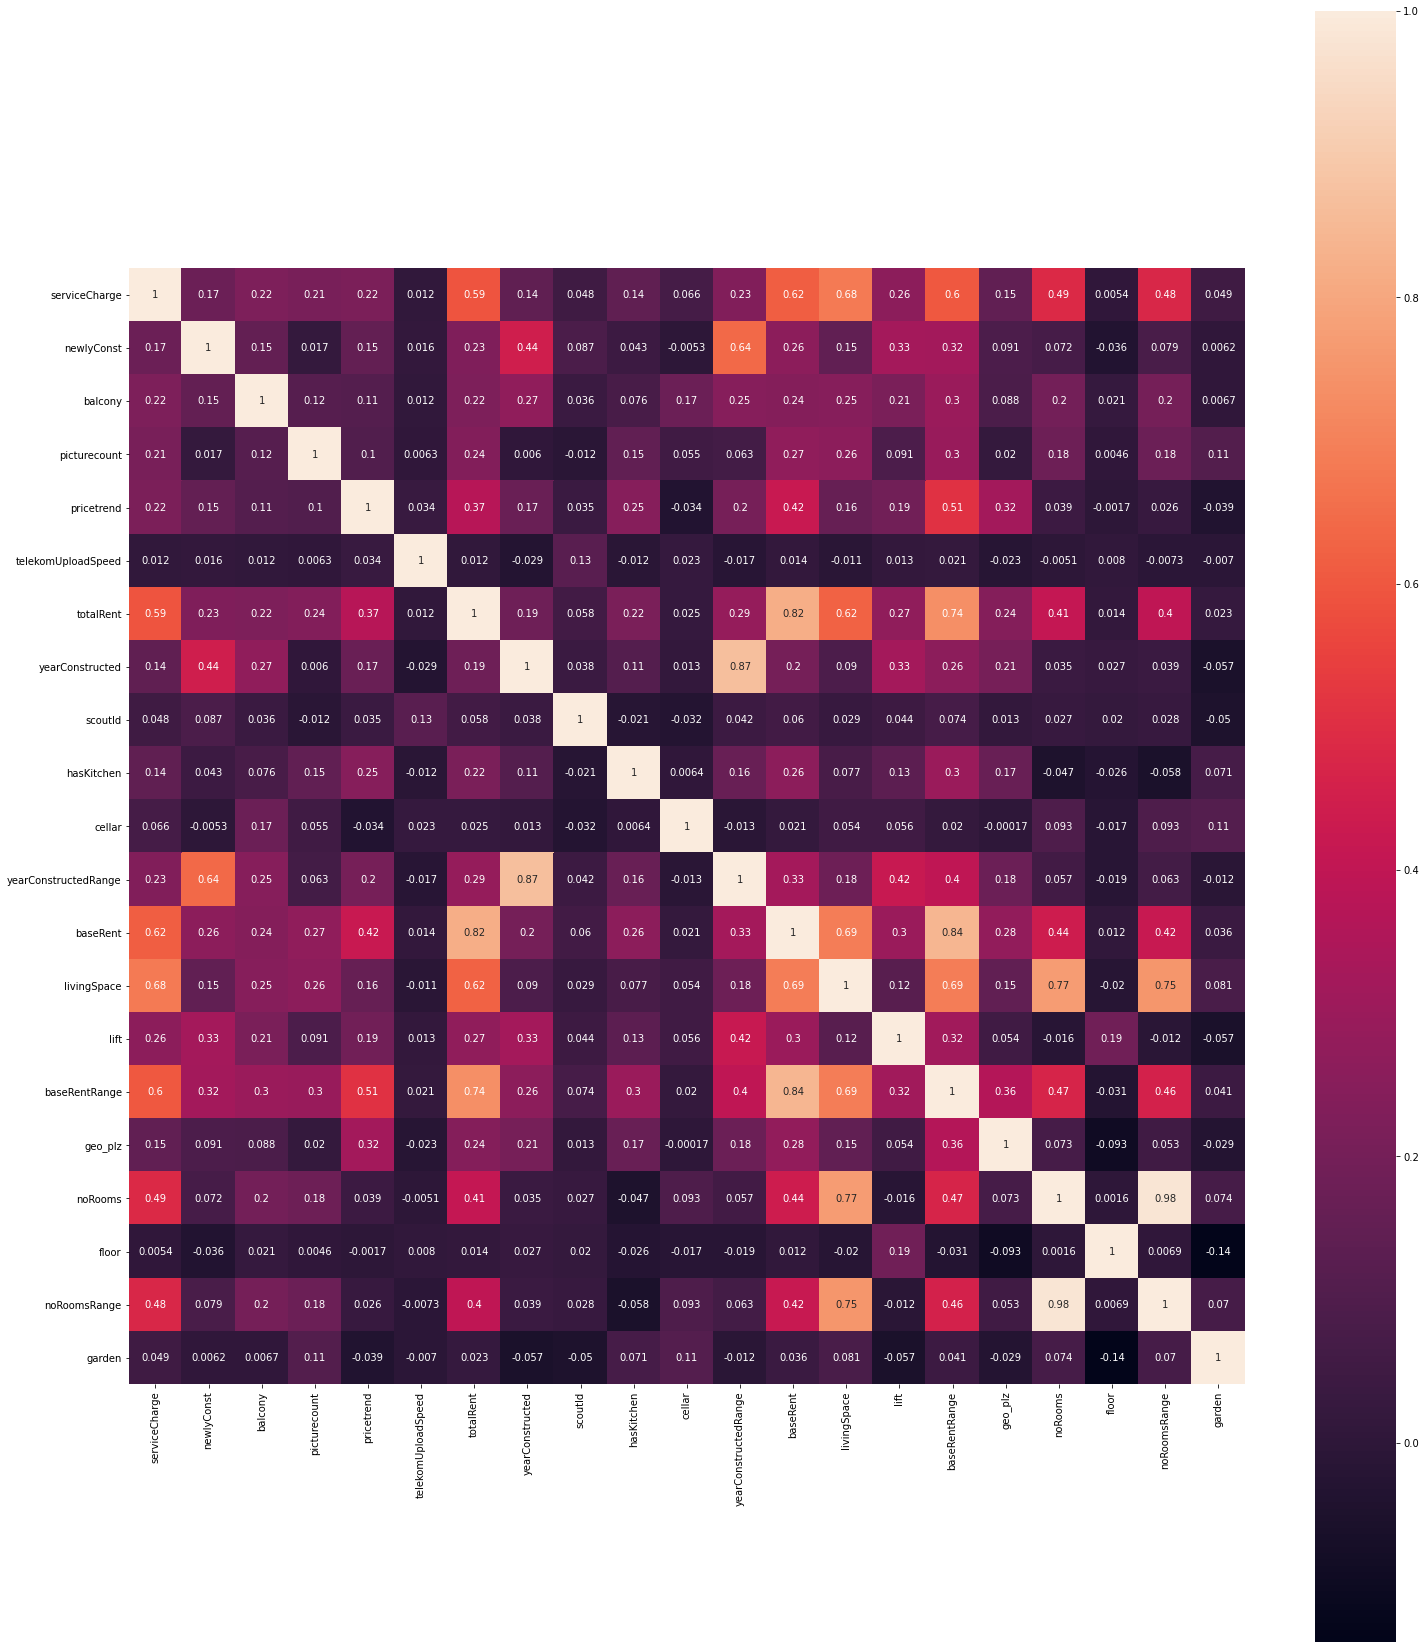

In [32]:
corr = df.corr()

f, ax = plt.subplots(figsize=(25, 30))

sns.heatmap(corr, square = True ,annot = True)

In [33]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)
        
columns

['regio1',
 'heatingType',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'condition',
 'lift',
 'typeOfFlat',
 'garden']

In [34]:
dummies_feature = pd.get_dummies(df[columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Hessen,regio1_Niedersachsen,...,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_other,condition_refurbished,condition_well_kept,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_other,typeOfFlat_roof_storey
0,False,False,False,True,False,True,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,True,True,False,True,True,False,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,False,True,False,False,False,False,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [35]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_other,condition_refurbished,condition_well_kept,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_other,typeOfFlat_roof_storey
0,Nordrhein_Westfalen,0.308220,central_heating,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,...,0,0,0,0,0,1,0,1,0,0
1,other,-0.056542,other,False,True,-0.279627,0.041365,-1.229879e+00,3.711434e-18,-2.287243,...,0,0,0,0,1,0,0,1,0,0
2,Sachsen,0.341081,other,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,...,0,0,0,0,0,0,1,0,0,0
3,Sachsen,-0.305795,other,False,True,-0.123581,-0.949357,7.321796e-01,3.711434e-18,-0.057555,...,0,0,0,0,0,1,0,0,1,0
4,other,-0.043397,other,False,True,1.436871,-0.474423,-2.323544e-16,5.446935e-05,-0.393207,...,0,0,0,0,1,0,1,0,0,0


In [36]:
df = df.drop(columns=columns)
df.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,...,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_other,condition_refurbished,condition_well_kept,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_other,typeOfFlat_roof_storey
0,0.308220,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,-0.868944,-0.705474,-0.005074,0.045708,...,0,0,0,0,0,1,0,1,0,0
1,-0.056542,-0.279627,0.041365,-1.229879e+00,3.711434e-18,-2.287243,0.352699,-1.116939,0.005419,0.057484,...,0,0,0,0,1,0,0,1,0,0
2,0.341081,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,0.494191,2.174778,0.013865,0.037072,...,0,0,0,0,0,0,1,0,0,0
3,-0.305795,-0.123581,-0.949357,7.321796e-01,3.711434e-18,-0.057555,0.153687,-0.705474,-0.017973,-0.063611,...,0,0,0,0,0,1,0,0,1,0
4,-0.043397,1.436871,-0.474423,-2.323544e-16,5.446935e-05,-0.393207,0.622478,-1.116939,0.003628,0.041665,...,0,0,0,0,1,0,1,0,0,0


In [37]:
df.shape

(253250, 53)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253250 entries, 0 to 268849
Data columns (total 53 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   serviceCharge                                 253250 non-null  float64
 1   picturecount                                  253250 non-null  float64
 2   pricetrend                                    253250 non-null  float64
 3   telekomUploadSpeed                            253250 non-null  float64
 4   totalRent                                     253250 non-null  float64
 5   yearConstructed                               253250 non-null  float64
 6   scoutId                                       253250 non-null  float64
 7   yearConstructedRange                          253250 non-null  float64
 8   baseRent                                      253250 non-null  float64
 9   livingSpace                                   25

In [39]:
y = df['livingSpace'].values
x = df['noRooms'].values

print(x.shape)
print(y.shape)

(253250,)
(253250,)


# 5fold-cross validation

In [40]:
test_size = int(0.2 * x.shape[0])
test_size

50650

In [41]:
mses=[]
accs=[]

In [42]:
for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    
    b = np.random.randn(1)
    w = np.random.randn(1)
    n = x_train.shape[0]

    # Sets learning rate
    lr = 0.0001

    # Defines number of epochs
    n_epochs = 100
    test_error=0
    test_error =  y_test - np.sum((w * x_test) + b)
    test_mse = (test_error**2).mean()           
    print('init MSE : ',test_mse)
              
    for epoch in range(n_epochs):
        error = y_train - np.sum((w * x_train) + b)
        
        
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
        w_grad = 0
        b_grad = 0
    
    
        w_grad = -1 * (x_train * error).mean()
        w = w - (lr * w_grad)
            
        b_grad = -1 * error.mean()
        b = b - (lr*b_grad)
              

    test_error = y_test - np.sum((w * x_test) + b)
    test_mse = (test_error**2).mean()
    mses.append(test_mse)
    print('Final MSE : ',test_mse)
    
    
    y_pred = (w*x_test)+b
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    accs.append( counter*100/len(y_pred))

init MSE :  4372873208.556068
epoch 0 , MSE : 70803097879.88277
epoch 1 , MSE : 26266570596962.094
epoch 2 , MSE : 9744386232902326.0
epoch 3 , MSE : 3.614977550881856e+18
epoch 4 , MSE : 1.3410862809728764e+21
epoch 5 , MSE : 4.975168967714467e+23
epoch 6 , MSE : 1.8456908111350654e+26
epoch 7 , MSE : 6.847153518633862e+28
epoch 8 , MSE : 2.5401606284699244e+31
epoch 9 , MSE : 9.423501314625266e+33
epoch 10 , MSE : 3.495935494450778e+36
epoch 11 , MSE : 1.2969239960091001e+39
epoch 12 , MSE : 4.811335489725519e+41
epoch 13 , MSE : 1.784911780946786e+44
epoch 14 , MSE : 6.621675151454428e+46
epoch 15 , MSE : 2.4565125447337877e+49
epoch 16 , MSE : 9.113183211817669e+51
epoch 17 , MSE : 3.380813520785643e+54
epoch 18 , MSE : 1.2542159854204516e+57
epoch 19 , MSE : 4.652897086493674e+59
epoch 20 , MSE : 1.7261342184411536e+62
epoch 21 , MSE : 6.403621839654238e+64
epoch 22 , MSE : 2.3756190119635696e+67
epoch 23 , MSE : 8.813083956730793e+69
epoch 24 , MSE : 3.2694825406447266e+72
epoch 

epoch 5 , MSE : 2.3274932193295633e+23
epoch 6 , MSE : 8.63490066756161e+25
epoch 7 , MSE : 3.203511353735916e+28
epoch 8 , MSE : 1.1884890618449796e+31
epoch 9 , MSE : 4.409243777075762e+33
epoch 10 , MSE : 1.6358106531919564e+36
epoch 11 , MSE : 6.068787820280043e+38
epoch 12 , MSE : 2.2514944217848578e+41
epoch 13 , MSE : 8.352948367033886e+43
epoch 14 , MSE : 3.09890825165905e+46
epoch 15 , MSE : 1.1496817566957657e+49
epoch 16 , MSE : 4.2652703285792015e+51
epoch 17 , MSE : 1.582397117280895e+54
epoch 18 , MSE : 5.870625878038976e+56
epoch 19 , MSE : 2.1779771855956414e+59
epoch 20 , MSE : 8.08020255339393e+61
epoch 21 , MSE : 2.997720716988049e+64
epoch 22 , MSE : 1.1121416125001498e+67
epoch 23 , MSE : 4.125997993225876e+69
epoch 24 , MSE : 1.5307276743141957e+72
epoch 25 , MSE : 5.678934446304451e+74
epoch 26 , MSE : 2.1068604812330312e+77
epoch 27 , MSE : 7.816362610542271e+79
epoch 28 , MSE : 2.899837222430955e+82
epoch 29 , MSE : 1.0758272531080389e+85
epoch 30 , MSE : 3.991

epoch 39 , MSE : 6.902792865385248e+108
epoch 40 , MSE : 2.560862283714156e+111
epoch 41 , MSE : 9.500525025219131e+113
epoch 42 , MSE : 3.524593115718281e+116
epoch 43 , MSE : 1.3075863279547717e+119
epoch 44 , MSE : 4.851005347054944e+121
epoch 45 , MSE : 1.799671071351982e+124
epoch 46 , MSE : 6.676587085247147e+126
epoch 47 , MSE : 2.476942359994766e+129
epoch 48 , MSE : 9.189191088802144e+131
epoch 49 , MSE : 3.4090915570073746e+134
epoch 50 , MSE : 1.2647364856979946e+137
epoch 51 , MSE : 4.692037017802674e+139
epoch 52 , MSE : 1.7406955223783757e+142
epoch 53 , MSE : 6.457794109747062e+144
epoch 54 , MSE : 2.3957725074689265e+147
epoch 55 , MSE : 8.888059622217916e+149
epoch 56 , MSE : 3.2973750054240104e+152
epoch 57 , MSE : 1.2232908405807723e+155
epoch 58 , MSE : 4.538278109669802e+157
epoch 59 , MSE : 1.6836526128921196e+160
epoch 60 , MSE : 6.2461710199261085e+162
epoch 61 , MSE : 2.3172626058024383e+165
epoch 62 , MSE : 8.596796288670684e+167
epoch 63 , MSE : 3.18931942559

In [43]:
mse_sum=0
for i in mses:
    mse_sum = mse_sum+i
mse_mean = mse_sum/len(mses)
print(mse_mean)

1.370102494905654e+266


In [44]:
acc_sum=0
for i in accs:
    acc_sum = acc_sum+i
acc_mean = acc_sum/len(accs)
print(acc_mean)

60.919644619940776


# 10fold-cross validation

In [45]:
mses10=[]
accs10=[]
test_size = int(0.2 * x.shape[0])
for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    
    b = np.random.randn(1)
    w = np.random.randn(1)
    n = x_train.shape[0]

    # Sets learning rate
    lr = 0.0001

    # Defines number of epochs
    n_epochs = 100
    test_erroe = 0
    test_error =  y_test - np.sum((w * x_test) + b)
    test_mse = (test_error**2).mean()           
    print('init MSE : ',test_mse)
              
    for epoch in range(n_epochs):
        error = y_train - np.sum((w * x_train) + b)
        
        
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
        w_grad = 0
        b_grad = 0
    
    
        w_grad = -1 * (x_train * error).mean()
        w = w - (lr * w_grad)
            
        b_grad = -1 * error.mean()
        b = b - (lr*b_grad)
              

    test_error = y_test - np.sum((w * x_test) + b)
    test_mse = (test_error**2).mean()
    mses10.append(test_mse)
    print('Final MSE : ',test_mse)
    
    
    y_pred = (w*x_test)+b
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    accs10.append( counter*100/len(y_pred))

init MSE :  47165321.61781472
epoch 0 , MSE : 806888383.4224702
epoch 1 , MSE : 299339883642.69366
epoch 2 , MSE : 111049268024600.98
epoch 3 , MSE : 4.119711610110895e+16
epoch 4 , MSE : 1.5283327888225063e+19
epoch 5 , MSE : 5.669817051424343e+21
epoch 6 , MSE : 2.1033917240881405e+24
epoch 7 , MSE : 7.803173726480419e+26
epoch 8 , MSE : 2.8948255100714056e+29
epoch 9 , MSE : 1.0739238965450976e+32
epoch 10 , MSE : 3.98404854302309e+34
epoch 11 , MSE : 1.4780044325513191e+37
epoch 12 , MSE : 5.483108649534061e+39
epoch 13 , MSE : 2.0341265425502263e+42
epoch 14 , MSE : 7.546213390206948e+44
epoch 15 , MSE : 2.7994982288144666e+47
epoch 16 , MSE : 1.038559331400038e+50
epoch 17 , MSE : 3.852852892480171e+52
epoch 18 , MSE : 1.4293334008257002e+55
epoch 19 , MSE : 5.302548598996317e+57
epoch 20 , MSE : 1.9671422796441377e+60
epoch 21 , MSE : 7.297714817919812e+62
epoch 22 , MSE : 2.7073100972300094e+65
epoch 23 , MSE : 1.0043593296583268e+68
epoch 24 , MSE : 3.725977545401296e+70
epoch

epoch 30 , MSE : 2.8657713015509284e+87
epoch 31 , MSE : 1.0631889416188753e+90
epoch 32 , MSE : 3.944385670164666e+92
epoch 33 , MSE : 1.4633502763215853e+95
epoch 34 , MSE : 5.428967170750984e+97
epoch 35 , MSE : 2.0141236871311347e+100
epoch 36 , MSE : 7.472313056005389e+102
epoch 37 , MSE : 2.77219630371753e+105
epoch 38 , MSE : 1.0284730161524436e+108
epoch 39 , MSE : 3.815591065954622e+110
epoch 40 , MSE : 1.4155680269626841e+113
epoch 41 , MSE : 5.251697061665292e+115
epoch 42 , MSE : 1.948357232020961e+118
epoch 43 , MSE : 7.228322309902345e+120
epoch 44 , MSE : 2.6816767765753234e+123
epoch 45 , MSE : 9.94890657292865e+125
epoch 46 , MSE : 3.6910019455539155e+128
epoch 47 , MSE : 1.369345994177174e+131
epoch 48 , MSE : 5.080215289584938e+133
epoch 49 , MSE : 1.8847382252752492e+136
epoch 50 , MSE : 6.992298505727142e+138
epoch 51 , MSE : 2.5941129509406374e+141
epoch 52 , MSE : 9.624048510981201e+143
epoch 53 , MSE : 3.5704809888148597e+146
epoch 54 , MSE : 1.324633232775402e+

epoch 57 , MSE : 4.637074184142073e+156
epoch 58 , MSE : 1.7203048992679354e+159
epoch 59 , MSE : 6.382147080083432e+161
epoch 60 , MSE : 2.367708268990612e+164
epoch 61 , MSE : 8.783944300721507e+166
epoch 62 , MSE : 3.2587493353254735e+169
epoch 63 , MSE : 1.2089611303218224e+172
epoch 64 , MSE : 4.485116418084488e+174
epoch 65 , MSE : 1.6639301942169246e+177
epoch 66 , MSE : 6.17300295721022e+179
epoch 67 , MSE : 2.2901180375333942e+182
epoch 68 , MSE : 8.496092845233335e+184
epoch 69 , MSE : 3.1519595257444233e+187
epoch 70 , MSE : 1.1693432537645684e+190
epoch 71 , MSE : 4.338138335712813e+192
epoch 72 , MSE : 1.6094028985239463e+195
epoch 73 , MSE : 5.970712525357201e+197
epoch 74 , MSE : 2.2150704521007737e+200
epoch 75 , MSE : 8.21767433439847e+202
epoch 76 , MSE : 3.0486692376843185e+205
epoch 77 , MSE : 1.131023662241909e+208
epoch 78 , MSE : 4.19597675188521e+210
epoch 79 , MSE : 1.5566624722476787e+213
epoch 80 , MSE : 5.775051187820658e+215
epoch 81 , MSE : 2.1424821897191

In [46]:
mse10_sum=0
for i in mses10:
    mse10_sum = mse10_sum+i
mse10_mean = mse10_sum/len(mses10)
print(mse10_mean)

4.9085198099567254e+265


In [47]:
acc10_sum=0
for i in accs10:
    acc10_sum = acc10_sum+i
acc10_mean = acc10_sum/len(accs10)
print(acc10_mean)

60.919644619940776


In [48]:
x_train.shape

(202600,)

In [49]:
y_train.shape

(202600,)

# 2

In [50]:
mses5=[]
accs5=[]
test_size = int(0.2 * x.shape[0])
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    x_test = x_test.reshape((len(x_test),1 ))
    x_train = x_train.reshape((len(x_train),1 ))
  


    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    y_pred = Linear.predict(x_test)
    mses5.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs5.append(counter*100/len(y_pred))

In [51]:
mse5_sum=0
for i in mses5:
    mse5_sum = mse5_sum+i
mse5_mean = mse5_sum/len(mses5)
print(mse5_mean)

0.006084261010813247


In [52]:
acc5_sum=0
for i in accs5:
    acc5_sum = acc5_sum+i
acc5_mean = acc5_sum/len(accs5)
print(acc5_mean)

66.4639684106614


In [53]:
mses10=[]
accs10=[]
test_size = int(0.1 * x.shape[0])
for i in range(10):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    x_test = x_test.reshape((len(x_test),1 ))
    x_train = x_train.reshape((len(x_train),1 ))
  


    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    y_pred = Linear.predict(x_test)
    mses10.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs10.append(counter*100/len(y_pred))

In [54]:
mse10_sum=0
for i in mses10:
    mse10_sum = mse10_sum+i
mse10_mean = mse10_sum/len(mses10)
print(mse10_mean)

0.006084238666262701


In [55]:
acc10_sum=0
for i in accs10:
    acc10_sum = acc10_sum+i
acc10_mean = acc10_sum/len(accs10)
print(acc10_mean)

66.4548864758144


# 3

In [56]:
x = pd.DataFrame(x)
x.insert(1,"baseRent", df['baseRent'])

In [57]:
x.shape

(253250, 2)

In [58]:
x.insert(1,"telekomUploadSpeed", df['telekomUploadSpeed'])

In [59]:
x.insert(1,"scoutId", df['scoutId'])

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253250 entries, 0 to 253249
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   0                   253250 non-null  float64
 1   scoutId             238525 non-null  float64
 2   telekomUploadSpeed  238525 non-null  float64
 3   baseRent            238525 non-null  float64
dtypes: float64(4)
memory usage: 7.7 MB


In [61]:
x.fillna(x.mean(), inplace=True)

In [62]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253250 entries, 0 to 253249
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   0                   253250 non-null  float64
 1   scoutId             253250 non-null  float64
 2   telekomUploadSpeed  253250 non-null  float64
 3   baseRent            253250 non-null  float64
dtypes: float64(4)
memory usage: 7.7 MB


In [63]:
x=x.values

In [64]:

mses5=[]
accs5=[]
test_size = int(0.2 * x.shape[0])

for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    y_pred = Linear.predict(x_test)
    mses5.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs5.append(counter*100/len(y_pred))

In [65]:
mse5_sum=0
for i in mses5:
    mse5_sum = mse5_sum+i
mse5_mean = mse5_sum/len(mses5)
print(mse5_mean)

0.0060843712977161814


In [66]:
acc5_sum=0
for i in accs5:
    acc5_sum = acc5_sum+i
acc5_mean = acc5_sum/len(accs5)
print(acc5_mean)

66.55557749259626


In [67]:
mses10=[]
accs10=[]
test_size = int(0.1 * x.shape[0])
for i in range(10):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]

    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    y_pred = Linear.predict(x_test)
    mses10.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs10.append(counter*100/len(y_pred))

In [68]:
mse10_sum=0
for i in mses10:
    mse10_sum = mse10_sum+i
mse10_mean = mse10_sum/len(mses10)
print(mse10_mean)

0.006084289879942755


In [69]:
acc10_sum=0
for i in accs10:
    acc10_sum = acc10_sum+i
acc10_mean = acc10_sum/len(accs10)
print(acc10_mean)

66.57611056268509


# 4

In [70]:
x = df.drop(columns = ['livingSpace']).values

In [71]:
x.shape

(253250, 52)

In [72]:
mses5=[]
accs5=[]
test_size = int(0.2 * x.shape[0])

for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    y_pred = Linear.predict(x_test)
    mses5.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs5.append(counter*100/len(y_pred))

In [73]:
mse5_sum=0
for i in mses5:
    mse5_sum = mse5_sum+i
mse5_mean = mse5_sum/len(mses5)
print(mse5_mean)

0.0029538960173930468


In [74]:
acc5_sum=0
for i in accs5:
    acc5_sum = acc5_sum+i
acc5_mean = acc5_sum/len(accs5)
print(acc5_mean)

69.90365251727542


In [75]:
mses10=[]
accs10=[]
test_size = int(0.1 * x.shape[0])
for i in range(10):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]

    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    y_pred = Linear.predict(x_test)
    mses10.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs10.append(counter*100/len(y_pred))

In [76]:
mse10_sum=0
for i in mses10:
    mse10_sum = mse10_sum+i
mse10_mean = mse10_sum/len(mses10)
print(mse10_mean)

0.002945189154176345


In [77]:
acc10_sum=0
for i in accs10:
    acc10_sum = acc10_sum+i
acc10_mean = acc10_sum/len(accs10)
print(acc10_mean)

69.91036525172754


# 5

In [78]:
mses5=[]
accs5=[]
test_size = int(0.2 * x.shape[0])
from sklearn.linear_model import Ridge
for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    reg = Ridge(alpha=1.0)
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    mses5.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs5.append(counter*100/len(y_pred))

In [79]:
mse5_sum=0
for i in mses5:
    mse5_sum = mse5_sum+i
mse5_mean = mse5_sum/len(mses5)
print(mse5_mean)

0.0029499059881051963


In [80]:
acc5_sum=0
for i in accs5:
    acc5_sum = acc5_sum+i
acc5_mean = acc5_sum/len(accs5)
print(acc5_mean)

69.90365251727542


In [81]:
mses10=[]
accs10=[]
test_size = int(0.1 * x.shape[0])

for i in range(10):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    reg = Ridge(alpha=1.0)
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    mses10.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs10.append(counter*100/len(y_pred))

In [82]:
mse10_sum=0
for i in mses10:
    mse10_sum = mse10_sum+i
mse10_mean = mse10_sum/len(mses10)
print(mse10_mean)

0.002943337395407195


In [83]:
acc10_sum=0
for i in accs10:
    acc10_sum = acc10_sum+i
acc10_mean = acc10_sum/len(accs10)
print(acc10_mean)

69.90681145113525


# 6

In [84]:
mses5=[]
accs5=[]
test_size = int(0.2 * x.shape[0])
from sklearn.linear_model import Lasso
for i in range(5):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    reg = Lasso(alpha=1.0)
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    mses5.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs5.append(counter*100/len(y_pred))

In [85]:
mse5_sum=0
for i in mses5:
    mse5_sum = mse5_sum+i
mse5_mean = mse5_sum/len(mses5)
print(mse5_mean)

0.015035706883574307


In [86]:
acc5_sum=0
for i in accs5:
    acc5_sum = acc5_sum+i
acc5_mean = acc5_sum/len(accs5)
print(acc5_mean)

60.919644619940776


In [87]:

10
mses10=[]
accs10=[]
test_size = int(0.1 * x.shape[0])

for i in range(10):
    x_train = np.array(x[:i*test_size].tolist() + x[(i+1)*test_size:].tolist())
    y_train = np.array(y[:i*test_size].tolist() + y[(i+1)*test_size:].tolist())
    x_test = x[i*test_size:(i+1)*test_size]
    y_test = y[i*test_size:(i+1)*test_size]
    
    reg = Lasso(alpha=1.0)
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    mses10.append(mean_squared_error(y_pred,y_test))
    
    counter = 0
    for i in range(len(y_pred)):
        if abs((y_test[i] - y_pred[i]))/y_test[i] <= 0.2 :
            counter+=1
    
    accs10.append(counter*100/len(y_pred))


In [88]:
mse10_sum=0
for i in mses10:
    mse10_sum = mse10_sum+i
mse10_mean = mse10_sum/len(mses10)
print(mse10_mean)

0.015035328845715753


In [89]:
acc10_sum=0
for i in accs10:
    acc10_sum = acc10_sum+i
acc10_mean = acc10_sum/len(accs10)
print(acc10_mean)

60.919644619940776
